In [47]:
import numpy as np
import random
import matplotlib.pyplot as plt
#The length of the base element
l = 2
#The number of finite elements
n = 10
#The matrix defining the relationship of two successive set of coefficients
#The inverse matrix of the coefficient matrix
coefficient_mat = np.array([[6,0,0,0],[6*l,2,0,0],[3*l**2,2*l,1,0],[l**3,l**2,l,1]])  
i_coefficient_mat = np.linalg.inv(coefficient_mat)

#The list storing all the 3-degree polynomial coefficients, 4 X n in shape
curve_coefficient = []
#Generate a random distribution of initial position and spring coefficients
w_0 = [random.uniform(0,1)-0.5 for i in range(0,n)]
k = [random.uniform(0,1) * 0.01 for i in range(0,n)]

In [48]:
final_tip_pos = 3
final_tip_slope = [0.01,0.09,0.19,0.29,0.39,0.49,0.59]

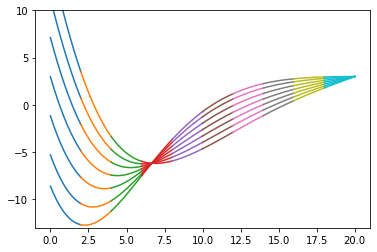

In [49]:
set_of_curves = len(final_tip_slope)
set_coe = []
for j in range(0,set_of_curves):
    #print("Curve {}".format(j))
    curve_coefficient = []
    for i in range(n-1,-1,-1):
        if i == n-1:
            #print("Start from last element")
            coe_at_i = np.dot(i_coefficient_mat,np.array([k[i]*(final_tip_pos-w_0[i]),
                                0,
                                final_tip_slope[j],
                                final_tip_pos]).T)
            curve_coefficient.append(coe_at_i)
            #print(curve_coefficient)
        else:
            #print("Iteration at {}".format(i))
            a,b,c,d = curve_coefficient[-1]
            cumulated_tissue_force = sum([ k[j]*(d - w_0[i]) for j in range(i,n) ])
            coe_at_i = np.dot(i_coefficient_mat,np.array([cumulated_tissue_force,
                                2*b,
                                c,
                                d]).T)
            curve_coefficient.append(coe_at_i)
    set_coe.append(curve_coefficient)

#print(len(curve_coefficient))
for j in range(0,set_of_curves):
    curve_coefficient = set_coe[j]
    for i,coe in enumerate(reversed(curve_coefficient)):
        a,b,c,d = coe
        x = np.linspace(0,l,num=10) + l*i
        element_func = a*(x - l*i)**3 + b*(x-l*i)**2 + c*(x-l*i) +d
        plt.plot(x,element_func)
ax = plt.gca()
#ax.set_xlim([xmin, xmax])
ax.set_ylim([-13, 10])
plt.show()